## Compare Resistant vs Susceptible MCAV Corals 

#### Installation

In [117]:
install.packages("remotes")
remotes::install_github("vegandevs/vegan")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Skipping install of 'vegan' from a github remote, the SHA1 (003391b9) has not changed since last install.
  Use `force = TRUE` to force installation



In [14]:
# Get the current working directory
current_directory <- getwd()
print(paste("Current Working Directory:", current_directory))

[1] "Current Working Directory: /project/pi_sarah_gignouxwolfsohn_uml_edu/brooke/CBC_metagenomics/mcav1"


In [1]:
# Set a new working directory
new_directory <- "//project/pi_sarah_gignouxwolfsohn_uml_edu/brooke/mcav_taxonomy/kraken"
setwd(new_directory)

# Check if the working directory has been changed
current_directory <- getwd()
print(paste("New Working Directory:", current_directory))


[1] "New Working Directory: /project/pi_sarah_gignouxwolfsohn_uml_edu/brooke/mcav_taxonomy/kraken"


In [40]:
install.packages('ecodist')

also installing the dependency ‘igraph’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [1]:
install.packages('tidyverse')

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
install.packages('ggvegan')

Warning message:
“package ‘ggvegan’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


In [6]:
install.packages('phyloseq')

Warning message:
“package ‘phyloseq’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


In [8]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("phyloseq")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.18 (BiocManager 1.30.22), R 4.3.2 (2023-10-31)

Installing package(s) 'BiocVersion', 'phyloseq'

also installing the dependencies ‘bitops’, ‘Rhdf5lib’, ‘rhdf5filters’, ‘zlibbioc’, ‘RCurl’, ‘GenomeInfoDbData’, ‘pixmap’, ‘sp’, ‘Rcpp’, ‘RcppArmadillo’, ‘rhdf5’, ‘S4Vectors’, ‘IRanges’, ‘XVector’, ‘GenomeInfoDb’, ‘codetools’, ‘iterators’, ‘survival’, ‘ade4’, ‘ape’, ‘Biobase’, ‘BiocGenerics’, ‘biomformat’, ‘Biostrings’, ‘foreach’, ‘igraph’, ‘multtest’, ‘plyr’, ‘reshape2’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Old packages: 'curl'



#### Begin Coding

In [3]:
library(tidyverse)
library(vegan)
library(phyloseq)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: permute

Loading required package: lattice

This is vegan 2.6-5



In [29]:
# Load otu and taxa table separately 

In [4]:
setwd('/project/pi_sarah_gignouxwolfsohn_uml_edu/brooke/mcav/healthy_2019_mcav/taxonomy')

In [81]:
taxa = read.csv('otu_id_species',header=TRUE)
head(taxa)
dim(taxa)

,name,taxonomy_id,taxonomy_lvl
,<chr>,<int>,<chr>
1,Homo sapiens,9606,S
2,Cutibacterium modestum,2559073,S
3,Cutibacterium acnes,1747,S
4,Cutibacterium granulosum,33011,S
5,Cutibacterium avidum,33010,S
6,Cutibacterium equinum,3016342,S


[1] 25487     3

In [82]:
# remove taxa level col
taxa$taxonomy_lvl <- NULL 
# change taxa table names
colnames(taxa) <- c("species", "otuid")

In [83]:
# remove duplicated entries
taxa_filter=taxa[!duplicated(taxa$species), ]

In [84]:
dim(taxa_filter)

[1] 25487     2

In [85]:
head(taxa_filter)

,species,otuid
,<chr>,<int>
1,Homo sapiens,9606
2,Cutibacterium modestum,2559073
3,Cutibacterium acnes,1747
4,Cutibacterium granulosum,33011
5,Cutibacterium avidum,33010
6,Cutibacterium equinum,3016342


In [86]:
# make the index the species names 
row.names(taxa_filter) <- taxa_filter$species
taxa_filter$species <- NULL
head(taxa_filter)

,otuid
,<int>
Homo sapiens,9606
Cutibacterium modestum,2559073
Cutibacterium acnes,1747
Cutibacterium granulosum,33011
Cutibacterium avidum,33010
Cutibacterium equinum,3016342


In [87]:
str(taxa_filter)

'data.frame':	25487 obs. of  1 variable:
 $ otuid: int  9606 2559073 1747 33011 33010 3016342 546874 630515 29405 2596828 ...


In [88]:
# convert to character matrix to create phyloseq objects 
taxa_filter$otuid <- as.character(taxa_filter$otuid)
taxonomy <- as.matrix(taxa_filter)

# check structure
str(taxonomy)

 chr [1:25487, 1] "9606" "2559073" "1747" "33011" "33010" "3016342" ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:25487] "Homo sapiens" "Cutibacterium modestum" "Cutibacterium acnes" "Cutibacterium granulosum" ...
  ..$ : chr "otuid"


In [108]:
otu = read.csv('otu_normtable_species',header=TRUE)
head(otu)

,X,X062019_BEL_CBC_T3_8_MCAV,X062019_BEL_CBC_T2_16_MCAV,X062019_BEL_CBC_T1_20_MCAV,X062019_BEL_CBC_T1_24_MCAV,X062019_BEL_CBC_T3_9_MCAV,X062019_BEL_CBC_T3_14_MCAV,X062019_BEL_CBC_T3_1_MCAV,X062019_BEL_CBC_T3_15_MCAV,X062019_BEL_CBC_T1_16_MCAV,X062019_BEL_CBC_T3_16_MCAV,X062019_BEL_CBC_T1_3_MCAV,X062019_BEL_CBC_T2_5_MCAV,X062019_BEL_CBC_T3_6_MCAV
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Cutibacterium modestum,419.40057581,1.2359783,0.0000000,1.541648,2064.2651015,2472.106860,0.152715,0.0000000,0.1327328,42.046456,0.6365703,0.0000000,39288.779376
2,Cutibacterium acnes,30.83715929,2.4719567,1.7779034,12.590129,404.1649146,487.060393,2.596155,8.1847620,0.9291293,177.326357,6.3657026,3.5288224,2468.874565
3,Cutibacterium granulosum,0.29151445,0.0000000,0.1185269,5.652711,12.7201547,6.984871,0.000000,2.5846617,0.1327328,29.249708,0.0000000,0.1102757,43.502032
4,Cutibacterium avidum,0.25349083,1.6479711,0.1185269,8.222125,0.4800058,1.343244,0.000000,4.3077694,0.1327328,18.281068,0.9548554,0.0000000,25.241920
5,Cutibacterium equinum,0.01267454,0.8239856,0.0000000,1.284707,1.4400175,1.074595,0.000000,0.4307769,0.2654655,1.828107,0.0000000,0.0000000,9.130056
6,Microlunatus sagamiharensis,0.16476904,2.0599639,0.4741076,7.194359,1.2000146,1.880542,0.152715,0.4307769,0.7963966,39.304296,0.9548554,0.1102757,1.074124


In [36]:
# i dont remember what this is for..

#otu=cbind(all$sample_id, all$otuid, all$abundance_normal)
#colnames(otu)=c("Sample", "OTUID", "count")

In [37]:
# or this...

#otu_table=pivot_wider(otu, names_from = Sample, values_from = count)

In [109]:
# rename first col as otu
names(otu)[1] <- "otu"
head(otu)

,otu,X062019_BEL_CBC_T3_8_MCAV,X062019_BEL_CBC_T2_16_MCAV,X062019_BEL_CBC_T1_20_MCAV,X062019_BEL_CBC_T1_24_MCAV,X062019_BEL_CBC_T3_9_MCAV,X062019_BEL_CBC_T3_14_MCAV,X062019_BEL_CBC_T3_1_MCAV,X062019_BEL_CBC_T3_15_MCAV,X062019_BEL_CBC_T1_16_MCAV,X062019_BEL_CBC_T3_16_MCAV,X062019_BEL_CBC_T1_3_MCAV,X062019_BEL_CBC_T2_5_MCAV,X062019_BEL_CBC_T3_6_MCAV
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Cutibacterium modestum,419.40057581,1.2359783,0.0000000,1.541648,2064.2651015,2472.106860,0.152715,0.0000000,0.1327328,42.046456,0.6365703,0.0000000,39288.779376
2,Cutibacterium acnes,30.83715929,2.4719567,1.7779034,12.590129,404.1649146,487.060393,2.596155,8.1847620,0.9291293,177.326357,6.3657026,3.5288224,2468.874565
3,Cutibacterium granulosum,0.29151445,0.0000000,0.1185269,5.652711,12.7201547,6.984871,0.000000,2.5846617,0.1327328,29.249708,0.0000000,0.1102757,43.502032
4,Cutibacterium avidum,0.25349083,1.6479711,0.1185269,8.222125,0.4800058,1.343244,0.000000,4.3077694,0.1327328,18.281068,0.9548554,0.0000000,25.241920
5,Cutibacterium equinum,0.01267454,0.8239856,0.0000000,1.284707,1.4400175,1.074595,0.000000,0.4307769,0.2654655,1.828107,0.0000000,0.0000000,9.130056
6,Microlunatus sagamiharensis,0.16476904,2.0599639,0.4741076,7.194359,1.2000146,1.880542,0.152715,0.4307769,0.7963966,39.304296,0.9548554,0.1102757,1.074124


In [110]:
# remove leading x's from sample names 
names(otu) <- sub("^X", "", names(otu))

In [111]:
otu_table=as.data.frame(otu)
head(otu_table)

,otu,062019_BEL_CBC_T3_8_MCAV,062019_BEL_CBC_T2_16_MCAV,062019_BEL_CBC_T1_20_MCAV,062019_BEL_CBC_T1_24_MCAV,062019_BEL_CBC_T3_9_MCAV,062019_BEL_CBC_T3_14_MCAV,062019_BEL_CBC_T3_1_MCAV,062019_BEL_CBC_T3_15_MCAV,062019_BEL_CBC_T1_16_MCAV,062019_BEL_CBC_T3_16_MCAV,062019_BEL_CBC_T1_3_MCAV,062019_BEL_CBC_T2_5_MCAV,062019_BEL_CBC_T3_6_MCAV
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Cutibacterium modestum,419.40057581,1.2359783,0.0000000,1.541648,2064.2651015,2472.106860,0.152715,0.0000000,0.1327328,42.046456,0.6365703,0.0000000,39288.779376
2,Cutibacterium acnes,30.83715929,2.4719567,1.7779034,12.590129,404.1649146,487.060393,2.596155,8.1847620,0.9291293,177.326357,6.3657026,3.5288224,2468.874565
3,Cutibacterium granulosum,0.29151445,0.0000000,0.1185269,5.652711,12.7201547,6.984871,0.000000,2.5846617,0.1327328,29.249708,0.0000000,0.1102757,43.502032
4,Cutibacterium avidum,0.25349083,1.6479711,0.1185269,8.222125,0.4800058,1.343244,0.000000,4.3077694,0.1327328,18.281068,0.9548554,0.0000000,25.241920
5,Cutibacterium equinum,0.01267454,0.8239856,0.0000000,1.284707,1.4400175,1.074595,0.000000,0.4307769,0.2654655,1.828107,0.0000000,0.0000000,9.130056
6,Microlunatus sagamiharensis,0.16476904,2.0599639,0.4741076,7.194359,1.2000146,1.880542,0.152715,0.4307769,0.7963966,39.304296,0.9548554,0.1102757,1.074124


In [112]:
# Remove the first column (OTUID) and set as row names
rownames(otu_table) <- otu_table$otu  
otu_table$otu=NULL

rownames(otu_table)
head(otu_table)
dim(otu_table)

[1] "Cutibacterium modestum"                                                                  
    [2] "Cutibacterium acnes"                                                                     
    [3] "Cutibacterium granulosum"                                                                
    [4] "Cutibacterium avidum"                                                                    
    [5] "Cutibacterium equinum"                                                                   
    [6] "Microlunatus sagamiharensis"                                                             
    [7] "Microlunatus soli"                                                                       
    [8] "Microlunatus phosphovorus"                                                               
    [9] "Microlunatus elymi"                                                                      
   [10] "Microlunatus sp. Gsoil 973"                                                              
   [11] "Propioniciclava soli"                                                                    
   [12] "Propioniciclava coleopterorum"                                                           
   [13] "Propioniciclava sp. MC1595"                                                              
   [14] "Acidipropionibacterium virtanenii"                                                       
   [15] "Acidipropionibacterium acidipropionici"                                                  
   [16] "Acidipropionibacterium jensenii"                                                         
   [17] "Tessaracoccus flavescens"                                                                
   [18] "Tessaracoccus flavus"                                                                    
   [19] "Tessaracoccus sp. MC1865"                                                                
   [20] "Tessaracoccus sp. T2.5-30"                                                               
   [21] "Tessaracoccus sp. T21"                                                                   
   [22] "Tessaracoccus palaemonis"                                                                
   [23] "Tessaracoccus defluvii"                                                                  
   [24] "Tessaracoccus aquimaris"                                                                 
   [25] "Tessaracoccus lapidicaptus"                                                              
   [26] "Tessaracoccus timonensis"                                                                
   [27] "Brooklawnia sp. SH051"                                                                   
   [28] "Auraticoccus monumenti"                                                                  
   [29] "Raineyella sp. LH-20"                                                                    
   [30] "Raineyella sp. W15-4"                                                                    
   [31] "Raineyella fluvialis"                                                                    
   [32] "Propionimicrobium sp. PCR01-08-3"                                                        
   [33] "Arachnia propionica"                                                                     
   [34] "Arachnia rubra"                                                                          
   [35] "Propionibacterium freudenreichii"                                                        
   [36] "Propionibacterium australiense"                                                          
   [37] "Propionibacterium acidifaciens"                                                          
   [38] "Vaginimicrobium propionicum"                                                             
   [39] "Nocardioides sp. S-1144"                                                                 
   [40] "Nocardioides sp. S-34"                                                                   
   [41] "Nocardioides sp. JQ2195"           

,062019_BEL_CBC_T3_8_MCAV,062019_BEL_CBC_T2_16_MCAV,062019_BEL_CBC_T1_20_MCAV,062019_BEL_CBC_T1_24_MCAV,062019_BEL_CBC_T3_9_MCAV,062019_BEL_CBC_T3_14_MCAV,062019_BEL_CBC_T3_1_MCAV,062019_BEL_CBC_T3_15_MCAV,062019_BEL_CBC_T1_16_MCAV,062019_BEL_CBC_T3_16_MCAV,062019_BEL_CBC_T1_3_MCAV,062019_BEL_CBC_T2_5_MCAV,062019_BEL_CBC_T3_6_MCAV
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Cutibacterium modestum,419.40057581,1.2359783,0.0000000,1.541648,2064.2651015,2472.106860,0.152715,0.0000000,0.1327328,42.046456,0.6365703,0.0000000,39288.779376
Cutibacterium acnes,30.83715929,2.4719567,1.7779034,12.590129,404.1649146,487.060393,2.596155,8.1847620,0.9291293,177.326357,6.3657026,3.5288224,2468.874565
Cutibacterium granulosum,0.29151445,0.0000000,0.1185269,5.652711,12.7201547,6.984871,0.000000,2.5846617,0.1327328,29.249708,0.0000000,0.1102757,43.502032
Cutibacterium avidum,0.25349083,1.6479711,0.1185269,8.222125,0.4800058,1.343244,0.000000,4.3077694,0.1327328,18.281068,0.9548554,0.0000000,25.241920
Cutibacterium equinum,0.01267454,0.8239856,0.0000000,1.284707,1.4400175,1.074595,0.000000,0.4307769,0.2654655,1.828107,0.0000000,0.0000000,9.130056
Microlunatus sagamiharensis,0.16476904,2.0599639,0.4741076,7.194359,1.2000146,1.880542,0.152715,0.4307769,0.7963966,39.304296,0.9548554,0.1102757,1.074124


[1] 25486    13

In [113]:
# Convert to matrix
otus=as.matrix(otu_table)
# Replace NAs with 0
#otus[is.na(otus)] <- 0

# Print the modified data frame
head(otus)
tail(otus)

,062019_BEL_CBC_T3_8_MCAV,062019_BEL_CBC_T2_16_MCAV,062019_BEL_CBC_T1_20_MCAV,062019_BEL_CBC_T1_24_MCAV,062019_BEL_CBC_T3_9_MCAV,062019_BEL_CBC_T3_14_MCAV,062019_BEL_CBC_T3_1_MCAV,062019_BEL_CBC_T3_15_MCAV,062019_BEL_CBC_T1_16_MCAV,062019_BEL_CBC_T3_16_MCAV,062019_BEL_CBC_T1_3_MCAV,062019_BEL_CBC_T2_5_MCAV,062019_BEL_CBC_T3_6_MCAV
Cutibacterium modestum,419.40057581,1.2359783,0.0000000,1.541648,2064.2651015,2472.106860,0.152715,0.0000000,0.1327328,42.046456,0.6365703,0.0000000,39288.779376
Cutibacterium acnes,30.83715929,2.4719567,1.7779034,12.590129,404.1649146,487.060393,2.596155,8.1847620,0.9291293,177.326357,6.3657026,3.5288224,2468.874565
Cutibacterium granulosum,0.29151445,0.0000000,0.1185269,5.652711,12.7201547,6.984871,0.000000,2.5846617,0.1327328,29.249708,0.0000000,0.1102757,43.502032
Cutibacterium avidum,0.25349083,1.6479711,0.1185269,8.222125,0.4800058,1.343244,0.000000,4.3077694,0.1327328,18.281068,0.9548554,0.0000000,25.241920
Cutibacterium equinum,0.01267454,0.8239856,0.0000000,1.284707,1.4400175,1.074595,0.000000,0.4307769,0.2654655,1.828107,0.0000000,0.0000000,9.130056
Microlunatus sagamiharensis,0.16476904,2.0599639,0.4741076,7.194359,1.2000146,1.880542,0.152715,0.4307769,0.7963966,39.304296,0.9548554,0.1102757,1.074124


,062019_BEL_CBC_T3_8_MCAV,062019_BEL_CBC_T2_16_MCAV,062019_BEL_CBC_T1_20_MCAV,062019_BEL_CBC_T1_24_MCAV,062019_BEL_CBC_T3_9_MCAV,062019_BEL_CBC_T3_14_MCAV,062019_BEL_CBC_T3_1_MCAV,062019_BEL_CBC_T3_15_MCAV,062019_BEL_CBC_T1_16_MCAV,062019_BEL_CBC_T3_16_MCAV,062019_BEL_CBC_T1_3_MCAV,062019_BEL_CBC_T2_5_MCAV,062019_BEL_CBC_T3_6_MCAV
Sulfolobus spindle-shaped virus 7,0,0,0,0,0,0,0,0,0,0,0,0,0
Sulfolobus spindle-shaped virus 8,0,0,0,0,0,0,0,0,0,0,0,0,0
Sulfolobus spindle-shaped virus 9,0,0,0,0,0,0,0,0,0,0,0,0,0
Sulfolobales Mexican fusellovirus 1,0,0,0,0,0,0,0,0,0,0,0,0,0
Sulfolobus spindle-shaped virus 6,0,0,0,0,0,0,0,0,0,0,0,0,0
Acidianus spindle-shaped virus 1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [42]:
meta = read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/brooke/metadata/CBC_samples.csv',header=TRUE)

In [43]:
meta$Year=sub('.*(?=.{4}$)', '', meta$Month_year, perl=T)

In [50]:
#meta$SeqID=paste0("T", meta$TransectNum, "_", meta$SampleNum, "_", meta$Year)

In [45]:
head(meta)

,Month_year,Country,Location,CollectionDate,Transect,TransectNum,OldTagNum,NewTagNum,Species,Time_sampled,⋯,SampleNum,Health_status,Sampling_notes,Tubelabel_species,Sample_physical_location,Extraction_physical_location,Date_sequenced,Notes,Year,SeqID
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,122022,BEL,CBC,12/5/22,CURLEW,4,,77,OFAV,,⋯,2,Healthy,,122022_BEL_CBC_T4_2_OFAV,UML_NARWHAL_R1_B5,UML_NARWHAL_R2_B3,,,2022,T4_2_2022
2,92023,BEL,CBC,9/25/23,CBC30N,1,,2,PAST,,⋯,171,Healthy,CLP 90%,092023_BEL_CBC_T1_171_PAST,UML_NARWHAL_R1_B10,,,,2023,T1_171_2023
3,92023,BEL,CBC,9/25/23,CBC30N,1,,21,PAST,,⋯,172,Healthy,No CL,092023_BEL_CBC_T1_172_PAST,UML_NARWHAL_R1_B10,,,,2023,T1_172_2023
4,92023,BEL,CBC,9/25/23,CBC30N,1,,3,SSID,,⋯,173,Healthy,CLP 80%; DC 20%,092023_BEL_CBC_T1_173_SSID,UML_NARWHAL_R1_B10,,,,2023,T1_173_2023
5,92023,BEL,CBC,9/25/23,CBC30N,1,,24,MCAV,,⋯,174,Healthy,CLP 10%,092023_BEL_CBC_T1_174_MCAV,UML_NARWHAL_R1_B10,,,,2023,T1_174_2023
6,92023,BEL,CBC,9/25/23,CBC30N,1,,13,PAST,,⋯,175,Healthy,No CL,092023_BEL_CBC_T1_175_PAST,UML_NARWHAL_R1_B10,,,,2023,T1_175_2023


In [51]:
colony=read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/brooke/metadata/CBC_ColonyData.csv',header=TRUE)

sample_colony=merge(meta, colony, by=c("TransectNum", "NewTagNum"))
sample_colony=sample_colony[!is.na(sample_colony$NewTagNum),]
sample_colony=sample_colony[sample_colony$Sample_type=="Core_EtOH",]
#sample_colony[sample_colony$SeqID=="T1_14_2019",]

In [55]:
# filter for mcavs only to save issues for later 
sample_colony<-sample_colony[sample_colony$Species.x=="MCAV",]

In [48]:
# remove duplicates (based on error from code below)
#sample_colony=sample_colony[!sample_colony$SeqID=="T4_3_2022",]
#sample_colony=sample_colony[!sample_colony$SeqID=="T4_4_2022",]

In [56]:
# make row names match sample IDs (tubelabels)
rownames(sample_colony)=sample_colony$Tubelabel_species
# label colonies as healthy or resistant
sample_colony$RS=ifelse(sample_colony$Date_DocumentedDisease=="Healthy", "Resistant", "Susceptible")
head(sample_colony)

,TransectNum,NewTagNum,Month_year,Country,Location,CollectionDate,Transect.x,OldTagNum.x,Species.x,Time_sampled,⋯,X122023_Condition,X122023_Percentage,X012024_Condition,X012024_Percentage,X022024_Condition,X022024_Percentage,X042024_Condition,X042024_Percentage,COLONIES_TO_LOOK_AT,RS
,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
062019_BEL_CBC_T1_17_MCAV,1,14,62019,BEL,CBC,6/24/19,CBC30N,381,MCAV,,⋯,Dead,,Dead,,Dead,,,,,Susceptible
052022_BEL_CBC_T1_60_MCAV,1,14,52022,BEL,CBC,5/21/22,CBC30N,381,MCAV,,⋯,Dead,,Dead,,Dead,,,,,Susceptible
052022_BEL_CBC_T1_39_MCAV,1,14,52022,BEL,CBC,5/21/22,CBC30N,381,MCAV,,⋯,Dead,,Dead,,Dead,,,,,Susceptible
062019_BEL_CBC_T1_24_MCAV,1,15,62019,BEL,CBC,6/26/19,CBC30N,359,MCAV,,⋯,Dead,,Dead,,Dead,,,,,Susceptible
052022_BEL_CBC_T1_70_MCAV,1,15,52022,BEL,CBC,5/21/22,CBC30N,359,MCAV,,⋯,Dead,,Dead,,Dead,,,,,Susceptible
052022_BEL_CBC_T1_40_MCAV,1,15,52022,BEL,CBC,5/21/22,CBC30N,359,MCAV,,⋯,Dead,,Dead,,Dead,,,,,Susceptible


In [57]:
dim(taxa_filter)

[1] 25487     1

In [58]:
dim(otus)

[1] 25487    13

In [116]:
head(otus)

,062019_BEL_CBC_T3_8_MCAV,062019_BEL_CBC_T2_16_MCAV,062019_BEL_CBC_T1_20_MCAV,062019_BEL_CBC_T1_24_MCAV,062019_BEL_CBC_T3_9_MCAV,062019_BEL_CBC_T3_14_MCAV,062019_BEL_CBC_T3_1_MCAV,062019_BEL_CBC_T3_15_MCAV,062019_BEL_CBC_T1_16_MCAV,062019_BEL_CBC_T3_16_MCAV,062019_BEL_CBC_T1_3_MCAV,062019_BEL_CBC_T2_5_MCAV,062019_BEL_CBC_T3_6_MCAV
Cutibacterium modestum,419.40057581,1.2359783,0.0000000,1.541648,2064.2651015,2472.106860,0.152715,0.0000000,0.1327328,42.046456,0.6365703,0.0000000,39288.779376
Cutibacterium acnes,30.83715929,2.4719567,1.7779034,12.590129,404.1649146,487.060393,2.596155,8.1847620,0.9291293,177.326357,6.3657026,3.5288224,2468.874565
Cutibacterium granulosum,0.29151445,0.0000000,0.1185269,5.652711,12.7201547,6.984871,0.000000,2.5846617,0.1327328,29.249708,0.0000000,0.1102757,43.502032
Cutibacterium avidum,0.25349083,1.6479711,0.1185269,8.222125,0.4800058,1.343244,0.000000,4.3077694,0.1327328,18.281068,0.9548554,0.0000000,25.241920
Cutibacterium equinum,0.01267454,0.8239856,0.0000000,1.284707,1.4400175,1.074595,0.000000,0.4307769,0.2654655,1.828107,0.0000000,0.0000000,9.130056
Microlunatus sagamiharensis,0.16476904,2.0599639,0.4741076,7.194359,1.2000146,1.880542,0.152715,0.4307769,0.7963966,39.304296,0.9548554,0.1102757,1.074124


In [114]:
otus_sorted <- otus[1:100, ]
dim(otus_sorted)

[1] 100  13

In [117]:
# create phyloseq objects 
OTU = otu_table((otus_sorted), taxa_are_rows = TRUE)
TAX <- tax_table(taxonomy)
SAMP=sample_data(sample_colony)

In [92]:
# check otu names match 
#taxa_names(OTU)

In [93]:
#taxa_names(TAX)

In [118]:
# Create phyloseq object
Corals = phyloseq(OTU, SAMP)
Corals

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 100 taxa and 12 samples ]
sample_data() Sample Data:       [ 12 samples by 62 sample variables ]

In [119]:
Corals.ord <- ordinate(Corals, "NMDS", "bray", trymax=1000)

Square root transformation
Wisconsin double standardization
Run 0 stress 0.03217204 
Run 1 stress 0.03217194 
... New best solution
... Procrustes: rmse 0.0002812484  max resid 0.0005153994 
... Similar to previous best
Run 2 stress 0.1752435 
Run 3 stress 0.03217191 
... New best solution
... Procrustes: rmse 0.0001208868  max resid 0.0002510776 
... Similar to previous best
Run 4 stress 0.1509372 
Run 5 stress 0.03217201 
... Procrustes: rmse 0.0002631152  max resid 0.000465373 
... Similar to previous best
Run 6 stress 0.03217199 
... Procrustes: rmse 0.0002364137  max resid 0.0004577014 
... Similar to previous best
Run 7 stress 0.1007119 
Run 8 stress 0.03217195 
... Procrustes: rmse 0.0001182611  max resid 0.0002363542 
... Similar to previous best
Run 9 stress 0.03217206 
... Procrustes: rmse 0.0001838067  max resid 0.000403909 
... Similar to previous best
Run 10 stress 0.03217189 
... New best solution
... Procrustes: rmse 8.194198e-05  max resid 0.0001540449 
... Similar to p

In [120]:
options(repr.plot.width=20, repr.plot.height=15)

Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


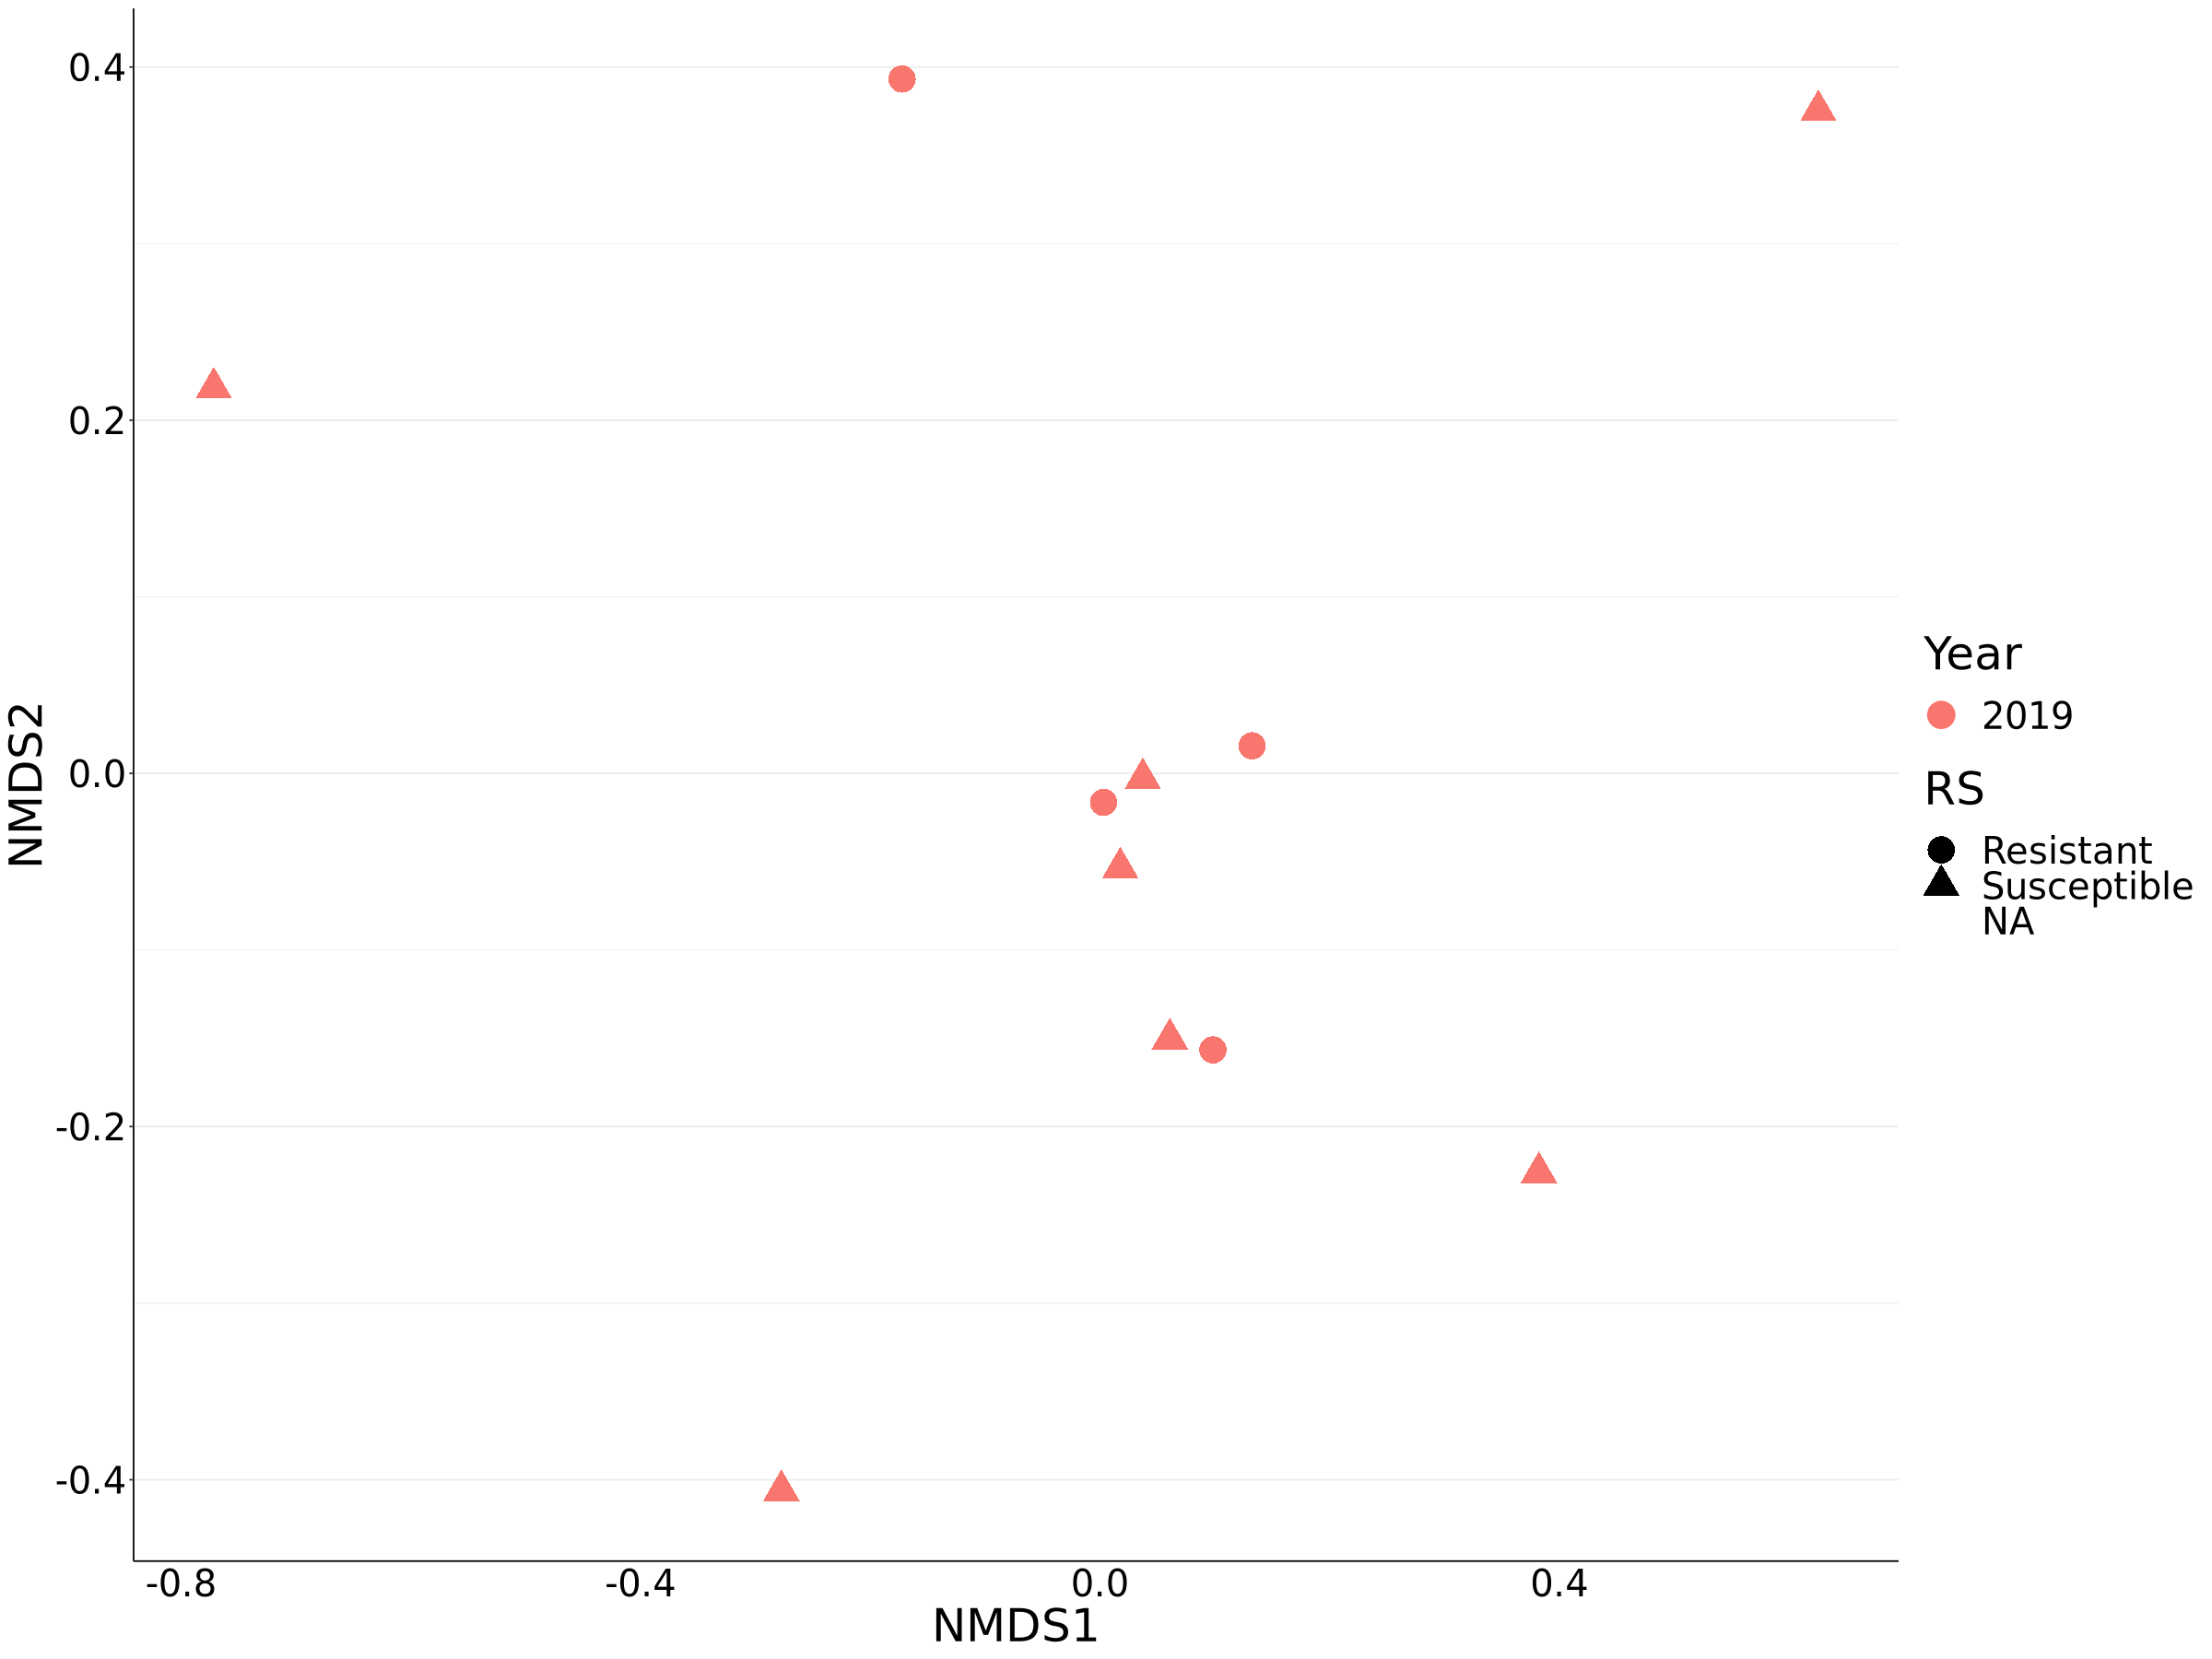

In [121]:
plot_ordination(Corals, Corals.ord, type="samples", color="Year", shape="RS")+
geom_point(size=8)+
theme_bw()+
 theme(legend.position="right", panel.border = element_blank(),
          panel.grid.major.x = element_blank(),
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=30))

In [ ]:
ggsave(file="/project/pi_sarah_gignouxwolfsohn_uml_edu/brooke/mcav/figures/RS_nMDS.pdf", width = 15, height=10)


Warning message in plot_ordination(Corals, Corals.ord, type = "samples", color = "Year", :
“Shape variable was not found in the available data you provided.No shape mapped.”


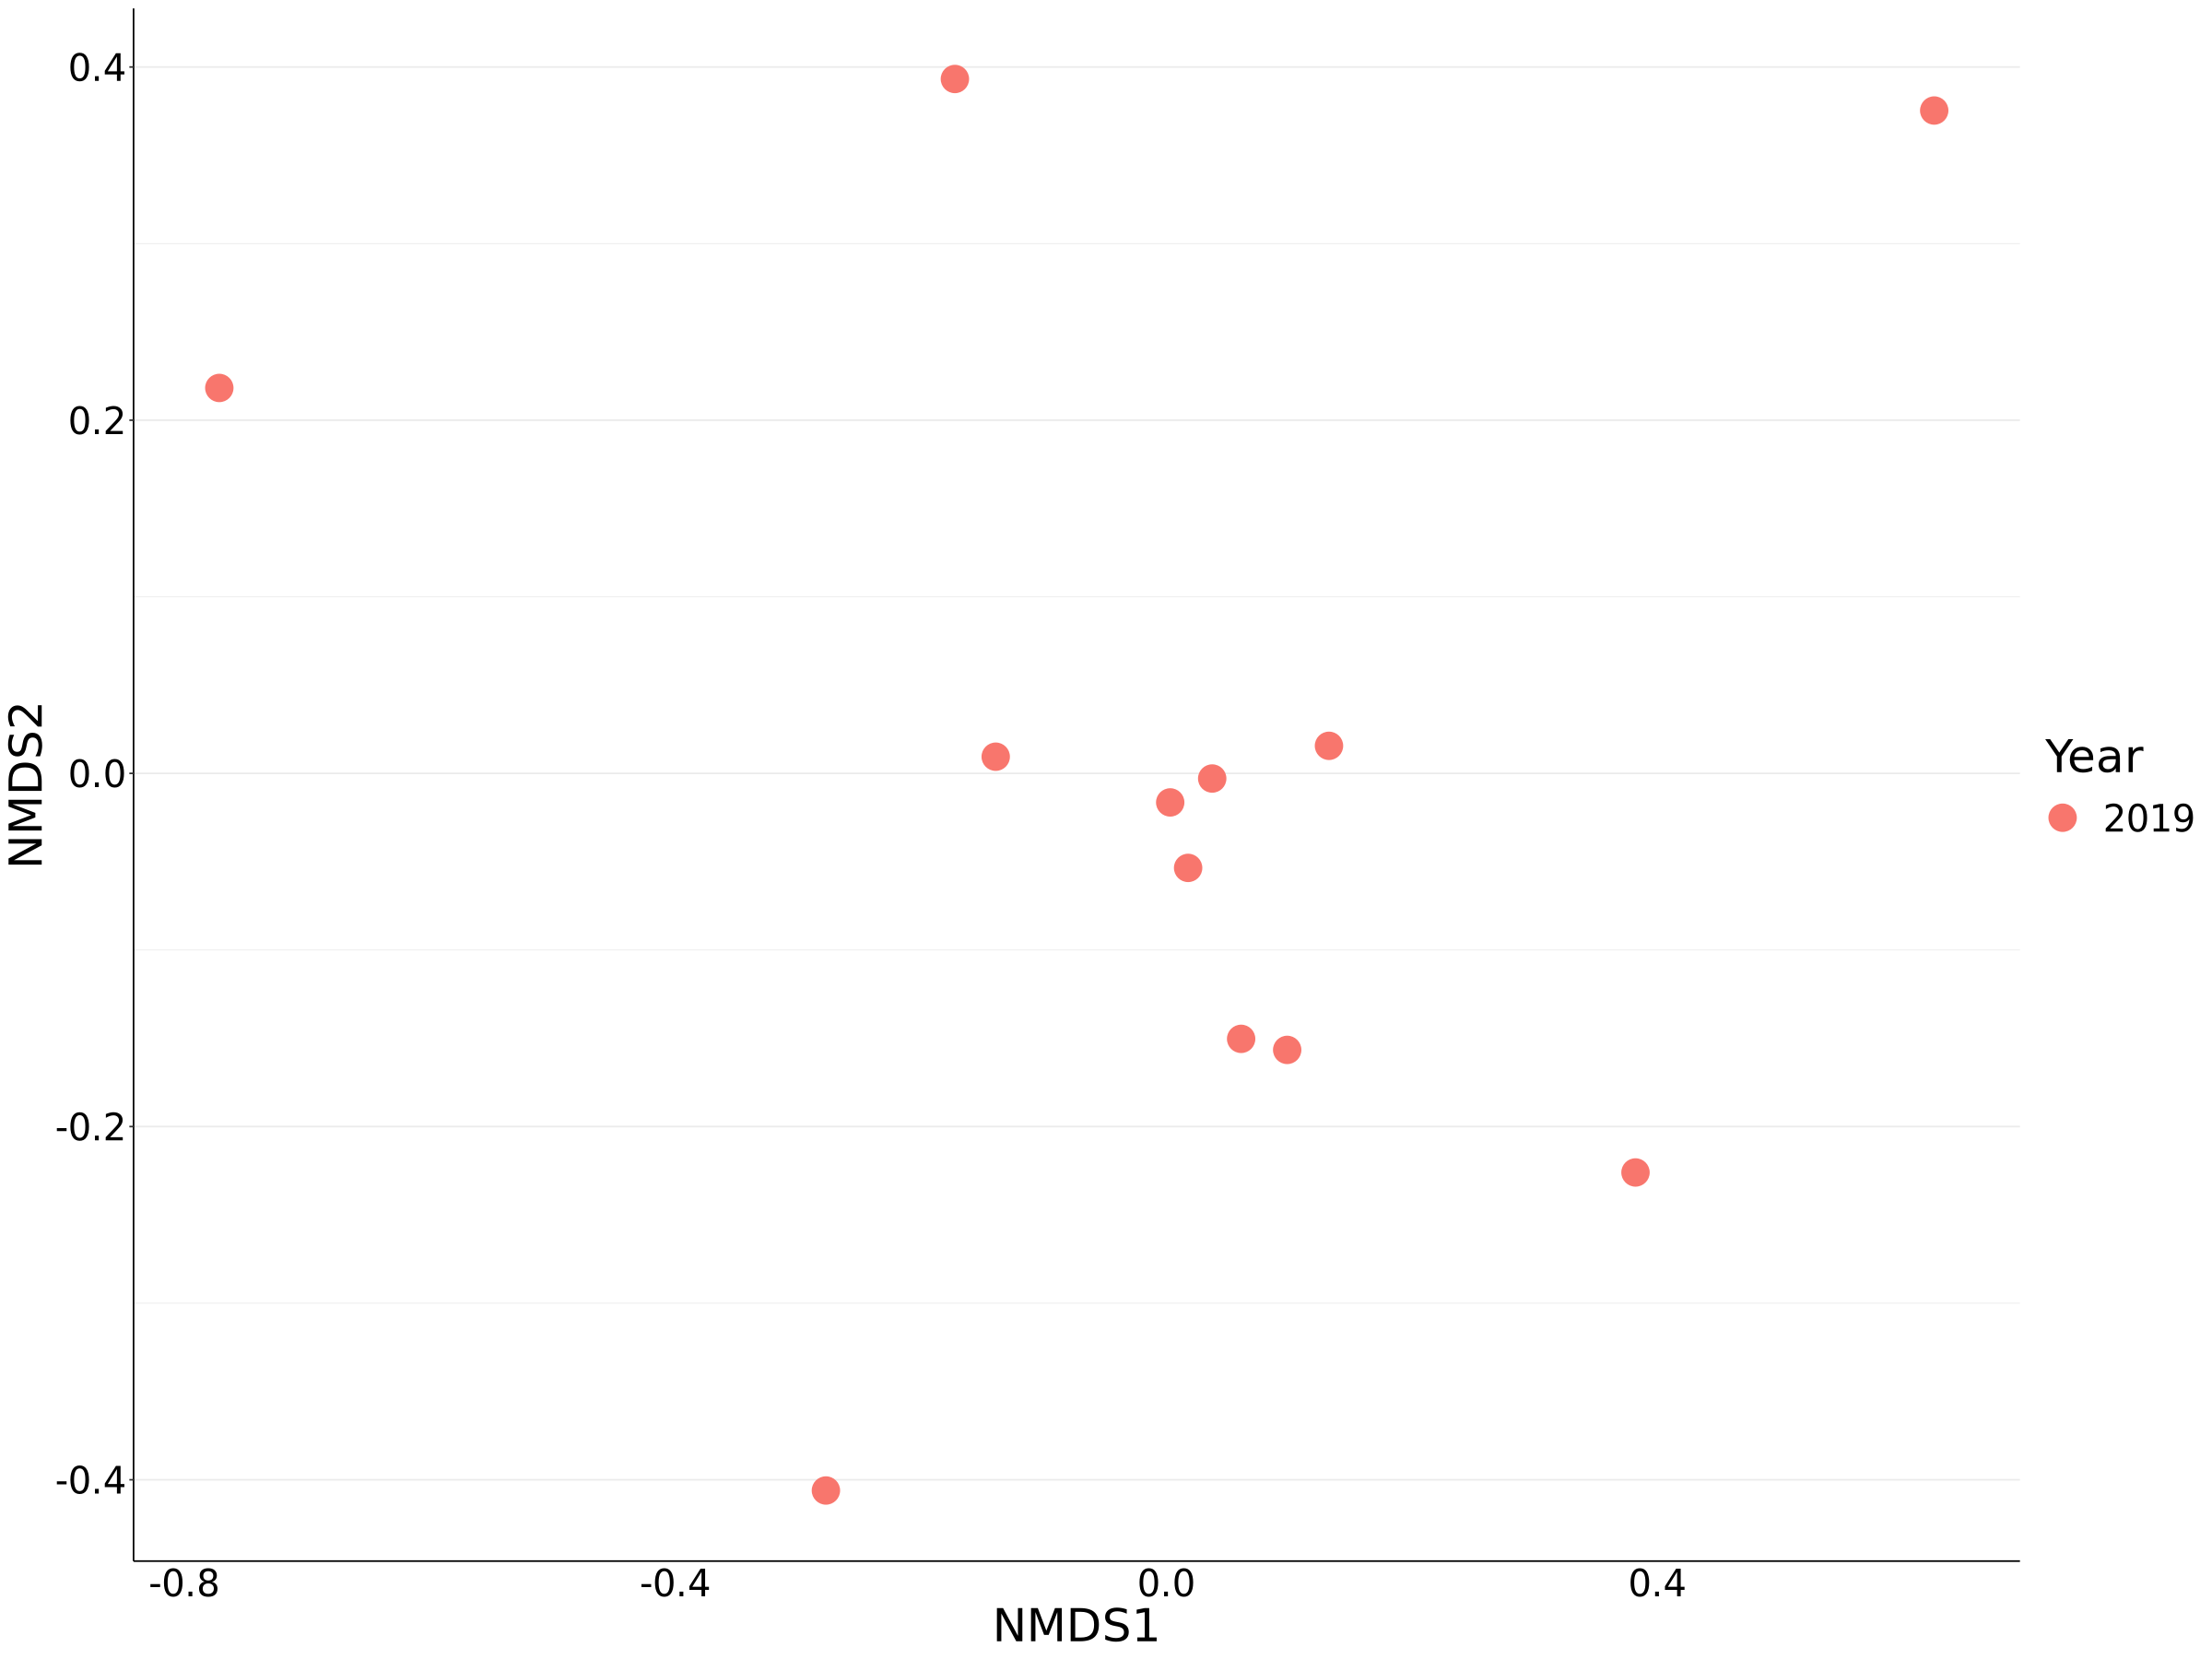

In [122]:
plot_ordination(Corals, Corals.ord, type="samples", color="Year", shape="Health.status")+
geom_point(size=8)+
theme_bw()+
 theme(legend.position="right", panel.border = element_blank(),
          panel.grid.major.x = element_blank(),
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=30))

In [ ]:
ggsave(file="/project/pi_sarah_gignouxwolfsohn_uml_edu/brooke/mcav/figures/health_status_nMDS.pdf", width = 15, height=10)


In [123]:
sample_variables(Corals)

[1] "TransectNum"                  "NewTagNum"                   
 [3] "Month_year"                   "Country"                     
 [5] "Location"                     "CollectionDate"              
 [7] "Transect.x"                   "OldTagNum.x"                 
 [9] "Species.x"                    "Time_sampled"                
[11] "Time_processed"               "Sample_type"                 
[13] "SampleNum"                    "Health_status"               
[15] "Sampling_notes"               "Tubelabel_species"           
[17] "Sample_physical_location"     "Extraction_physical_location"
[19] "Date_sequenced"               "Notes"                       
[21] "Year"                         "SeqID"                       
[23] "X"                            "Date_InitialTag"             
[25] "Transect.y"                   "OldTagNum.y"                 
[27] "Species.y"                    "Meter"                       
[29] "Meters_90"                    "Direction"                   
[31] "Size_Class"                   "Notes_June_2019"             
[33] "MaxDiameter"                  "Height"                      
[35] "Date_DocumentedDisease"       "Date_DocumentedMortality"    
[37] "Notes_May2022"                "Sept_2023"                   
[39] "Nov_2023"                     "Dec_2023"                    
[41] "Jan_2024"                     "Feb_2024"                    
[43] "April_2024"                   "X062019_Condition"           
[45] "X062019_Percentage"           "X052022_Condition"           
[47] "X122022_Condition"            "X052023_Condition"           
[49] "X092023_Condition"            "X092023_Percentage"          
[51] "X112023_Condition"            "X112023_Percentage"          
[53] "X122023_Condition"            "X122023_Percentage"          
[55] "X012024_Condition"            "X012024_Percentage"          
[57] "X022024_Condition"            "X022024_Percentage"          
[59] "X042024_Condition"            "X042024_Percentage"          
[61] "COLONIES_TO_LOOK_AT"          "RS"

In [ ]:
#install.packages('ggplot')
#if (!require("BiocManager", quietly = TRUE))
    #install.packages("BiocManager")

#BiocManager::install("ggplot2")

In [ ]:
#install.packages('RColorBrewer')

In [124]:
library(RColorBrewer)
library(ggplot2)

In [125]:
Corals

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 100 taxa and 12 samples ]
sample_data() Sample Data:       [ 12 samples by 62 sample variables ]

In [126]:
Corals_10 = prune_taxa(names(sort(taxa_sums(Corals),TRUE)[1:10]), Corals)

In [127]:
Corals_30 = prune_taxa(names(sort(taxa_sums(Corals),TRUE)[1:30]), Corals)

In [128]:
Corals_100 = prune_taxa(names(sort(taxa_sums(Corals),TRUE)[1:100]), Corals)

In [129]:
colnames(TAX)= c("Genus","OTUID")
TAX

ERROR: Error in dimnames(x) <- dn: length of 'dimnames' [2] not equal to array extent


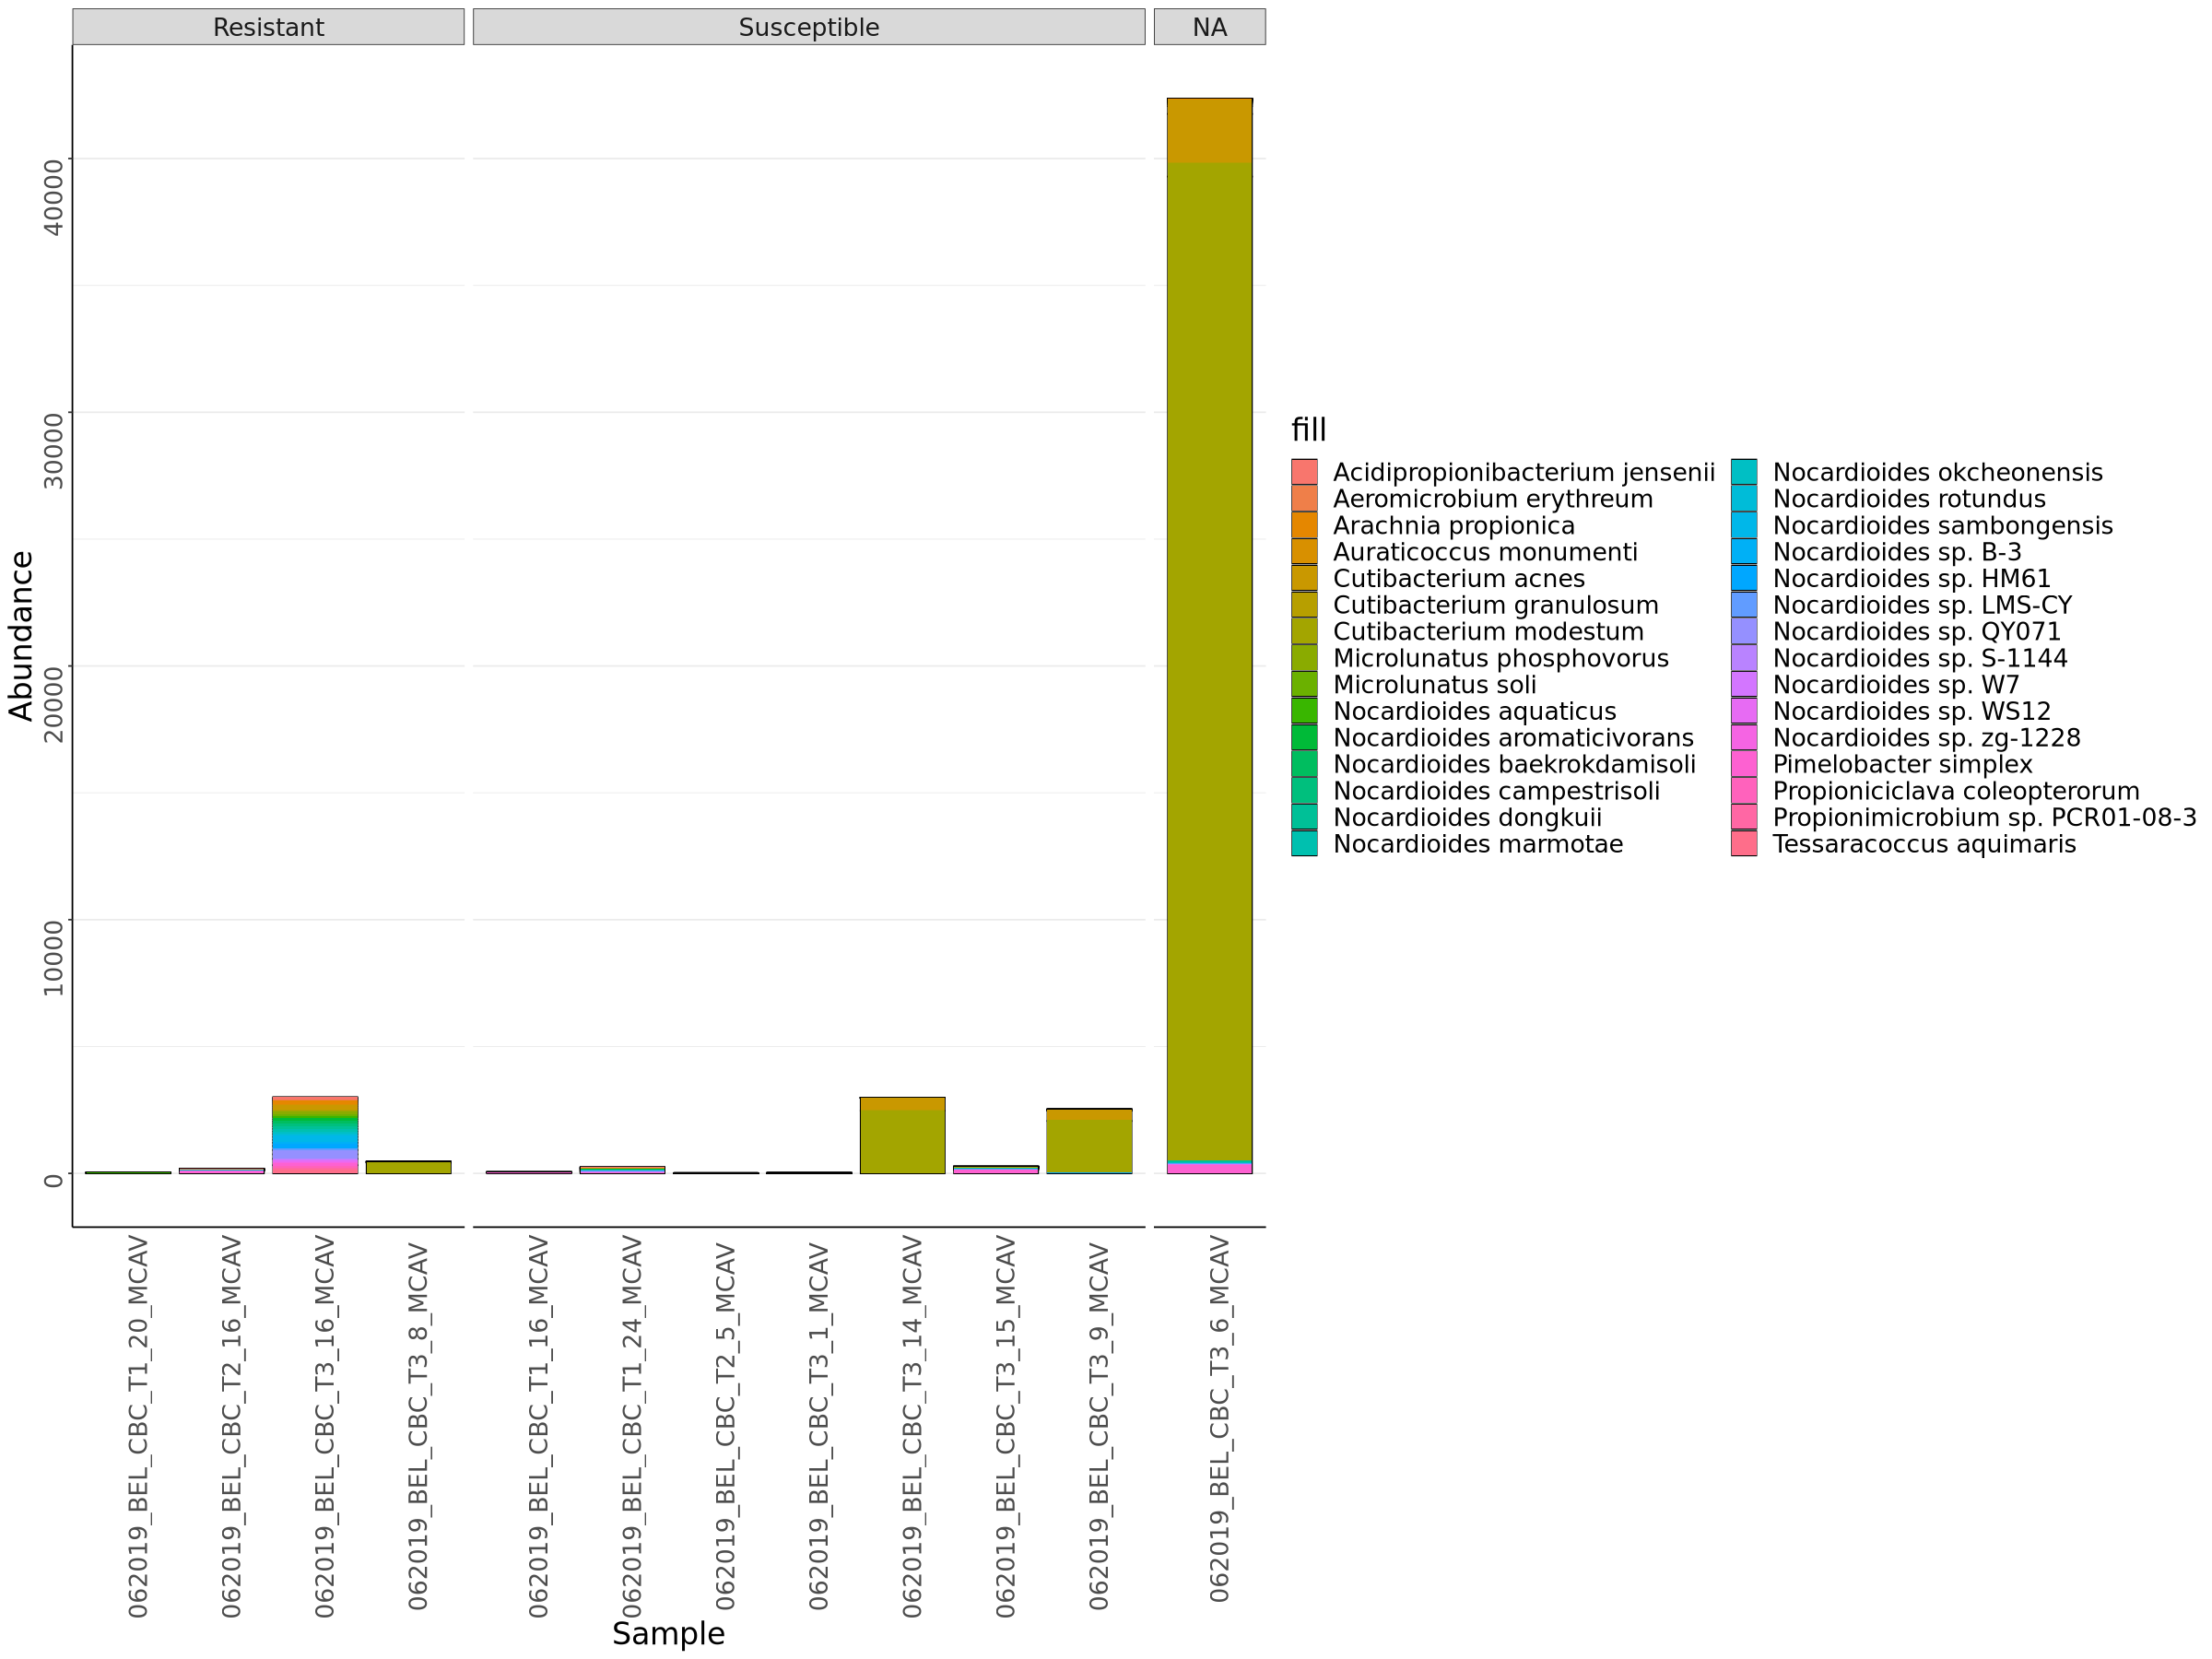

In [131]:
plot_bar(Corals_30)+
facet_grid(.~RS, scales="free_x", space="free")+
geom_bar(aes(fill=OTU), stat="identity", position="stack")+
theme_bw()+
theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(angle=90),
          text = element_text(size=20))

In [136]:
ggsave(file="/project/pi_sarah_gignouxwolfsohn_uml_edu/brooke/mcav/figures/bar_plot.pdf", width = 15, height=10)

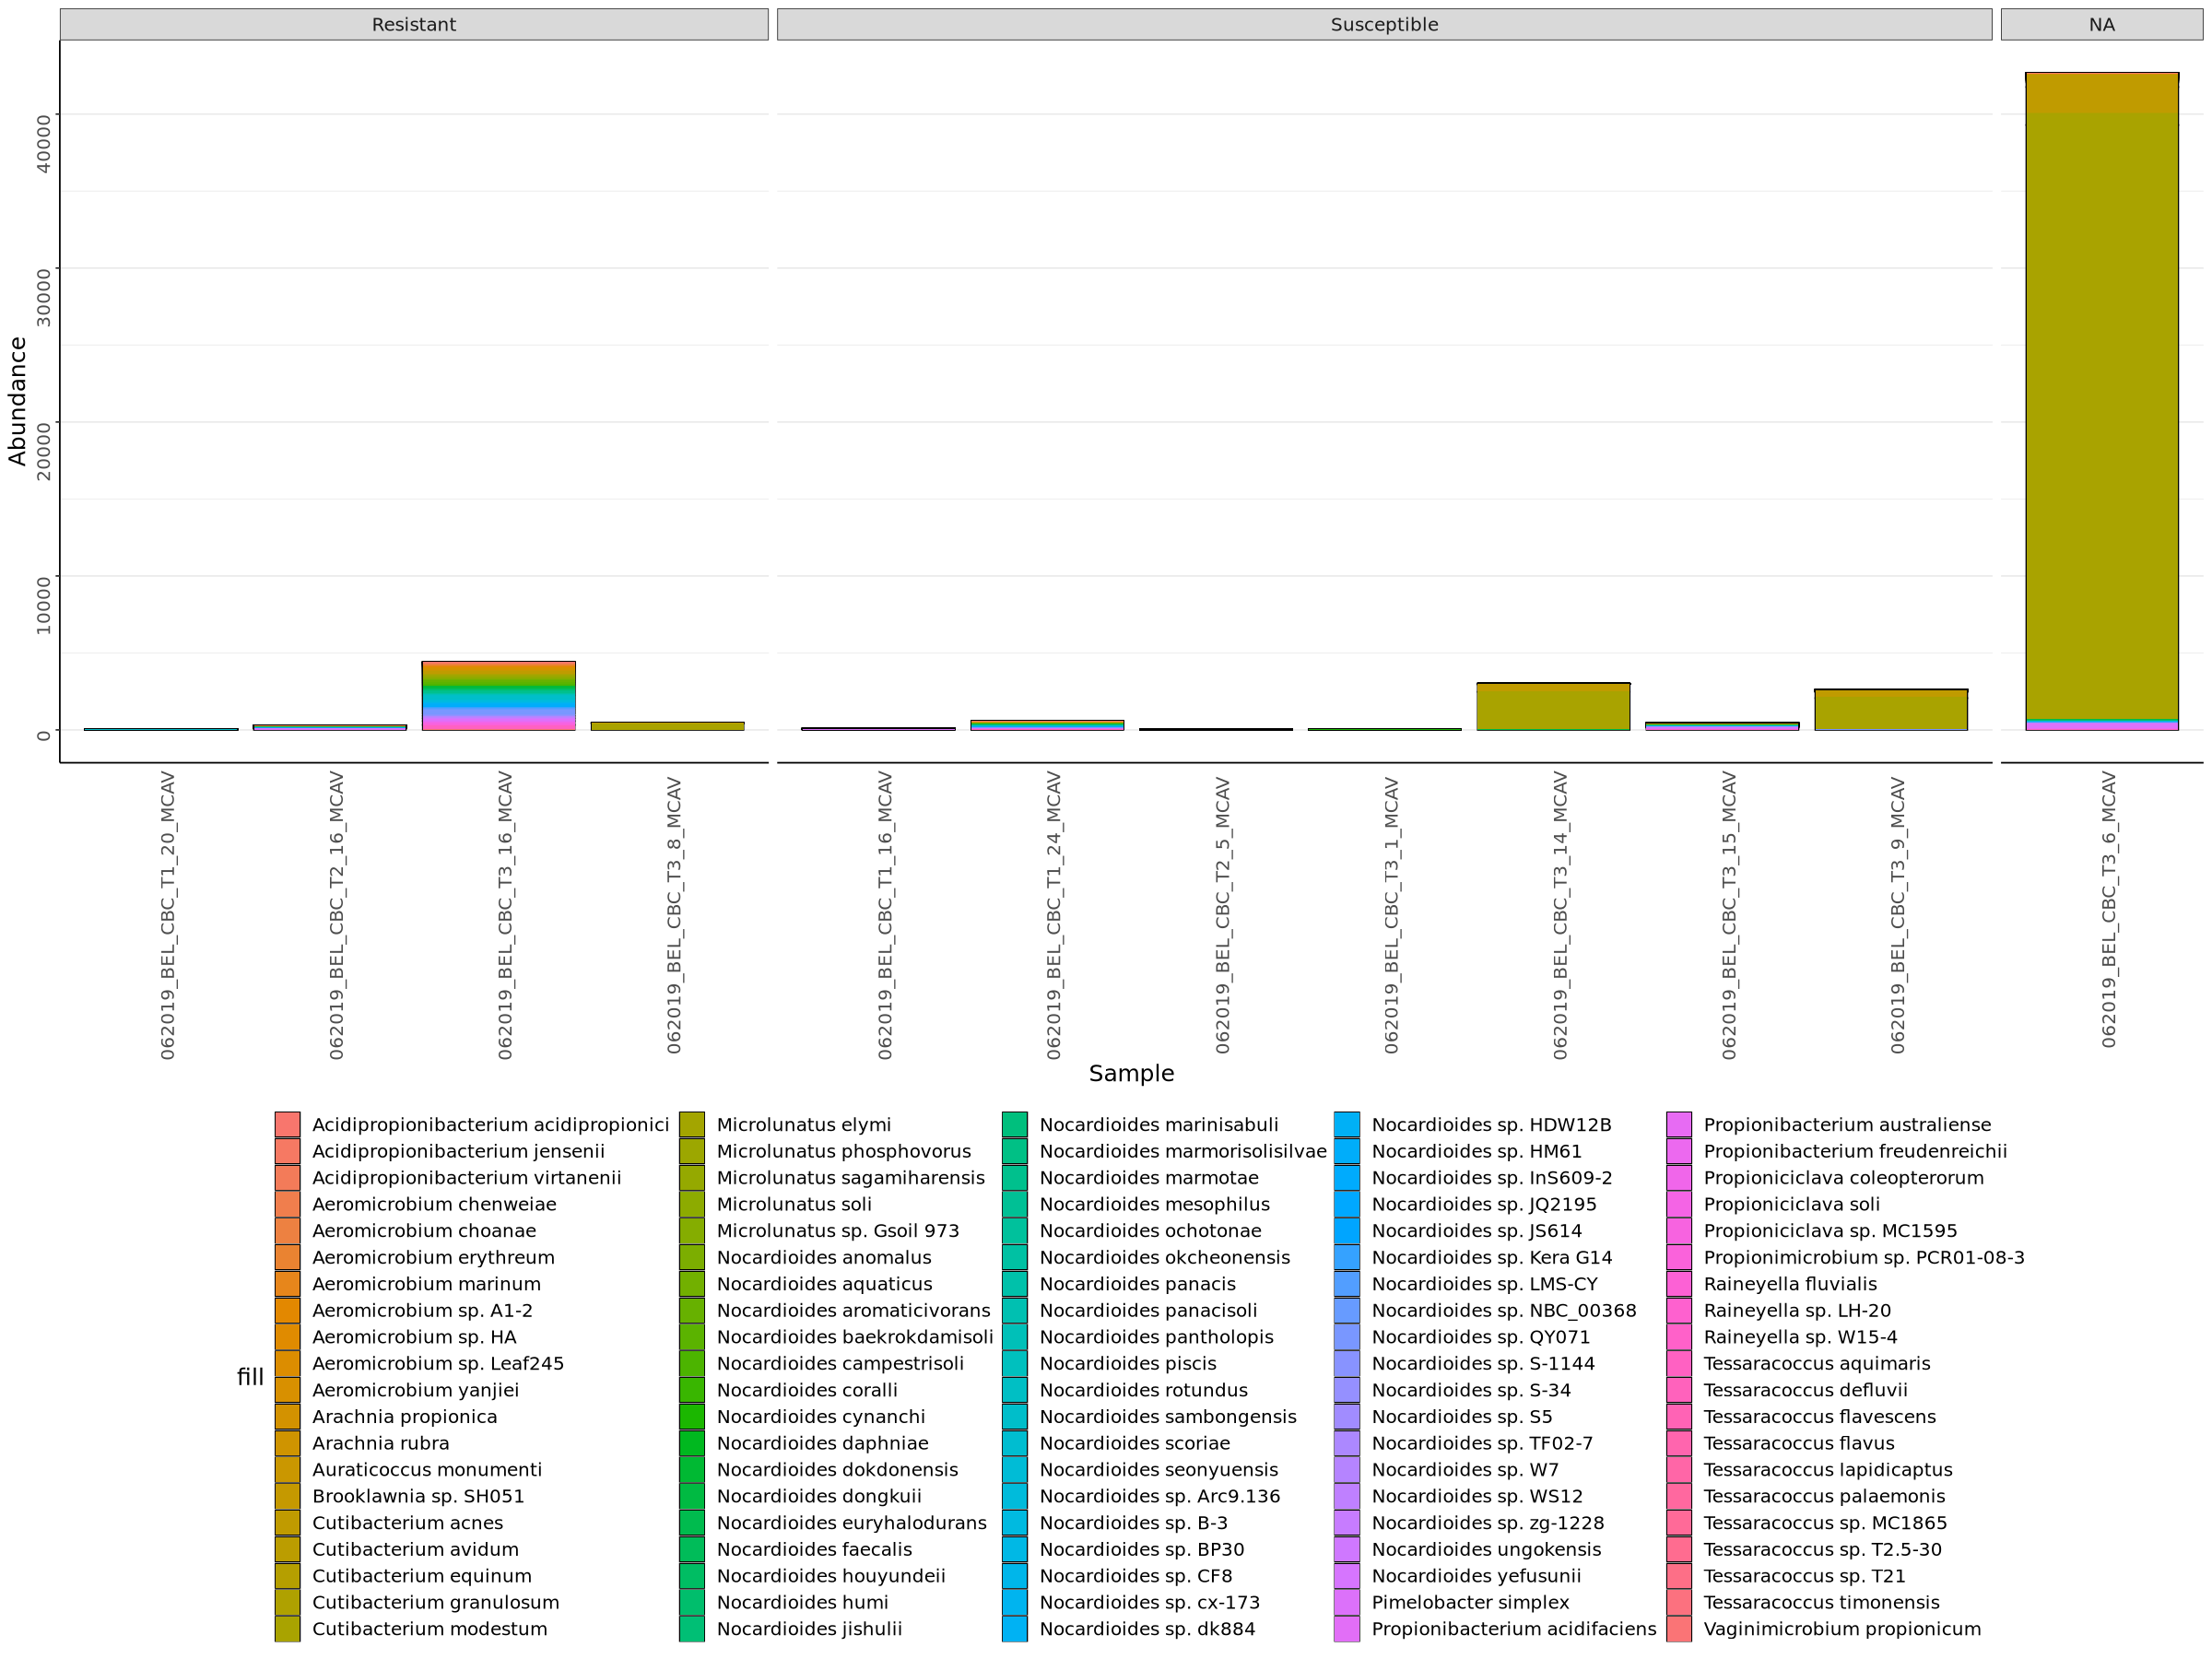

In [132]:
plot_bar(Corals_100)+
facet_grid(.~RS, scales="free_x", space="free")+
geom_bar(aes(fill=OTU), stat="identity", position="stack")+
theme_bw()+
theme(legend.position="bottom", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(angle=90),
          text = element_text(size=15))

In [146]:
ggsave(file="/project/pi_sarah_gignouxwolfsohn_uml_edu/brooke/mcav/figures/top100_bar_plot.pdf", width = 15, height=10)

In [ ]:
# ^^How do i add color to distinguish OTUs?

In [ ]:
OTU

In [ ]:
tax_table(Corals)

In [137]:
rich=estimate_richness(Corals)
rich

Warning message in estimate_richness(Corals):
“The data you have provided does not have
any singletons. This is highly suspicious. Results of richness
estimates (for example) are probably unreliable, or wrong, if you have already
trimmed low-abundance taxa from the data.

We recommended that you find the un-trimmed data and retry.”


ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'x' in selecting a method for function 't': function accepts only integers (counts)


Warning message in estimate_richness(physeq, split = TRUE, measures = measures):
“The data you have provided does not have
any singletons. This is highly suspicious. Results of richness
estimates (for example) are probably unreliable, or wrong, if you have already
trimmed low-abundance taxa from the data.

We recommended that you find the un-trimmed data and retry.”


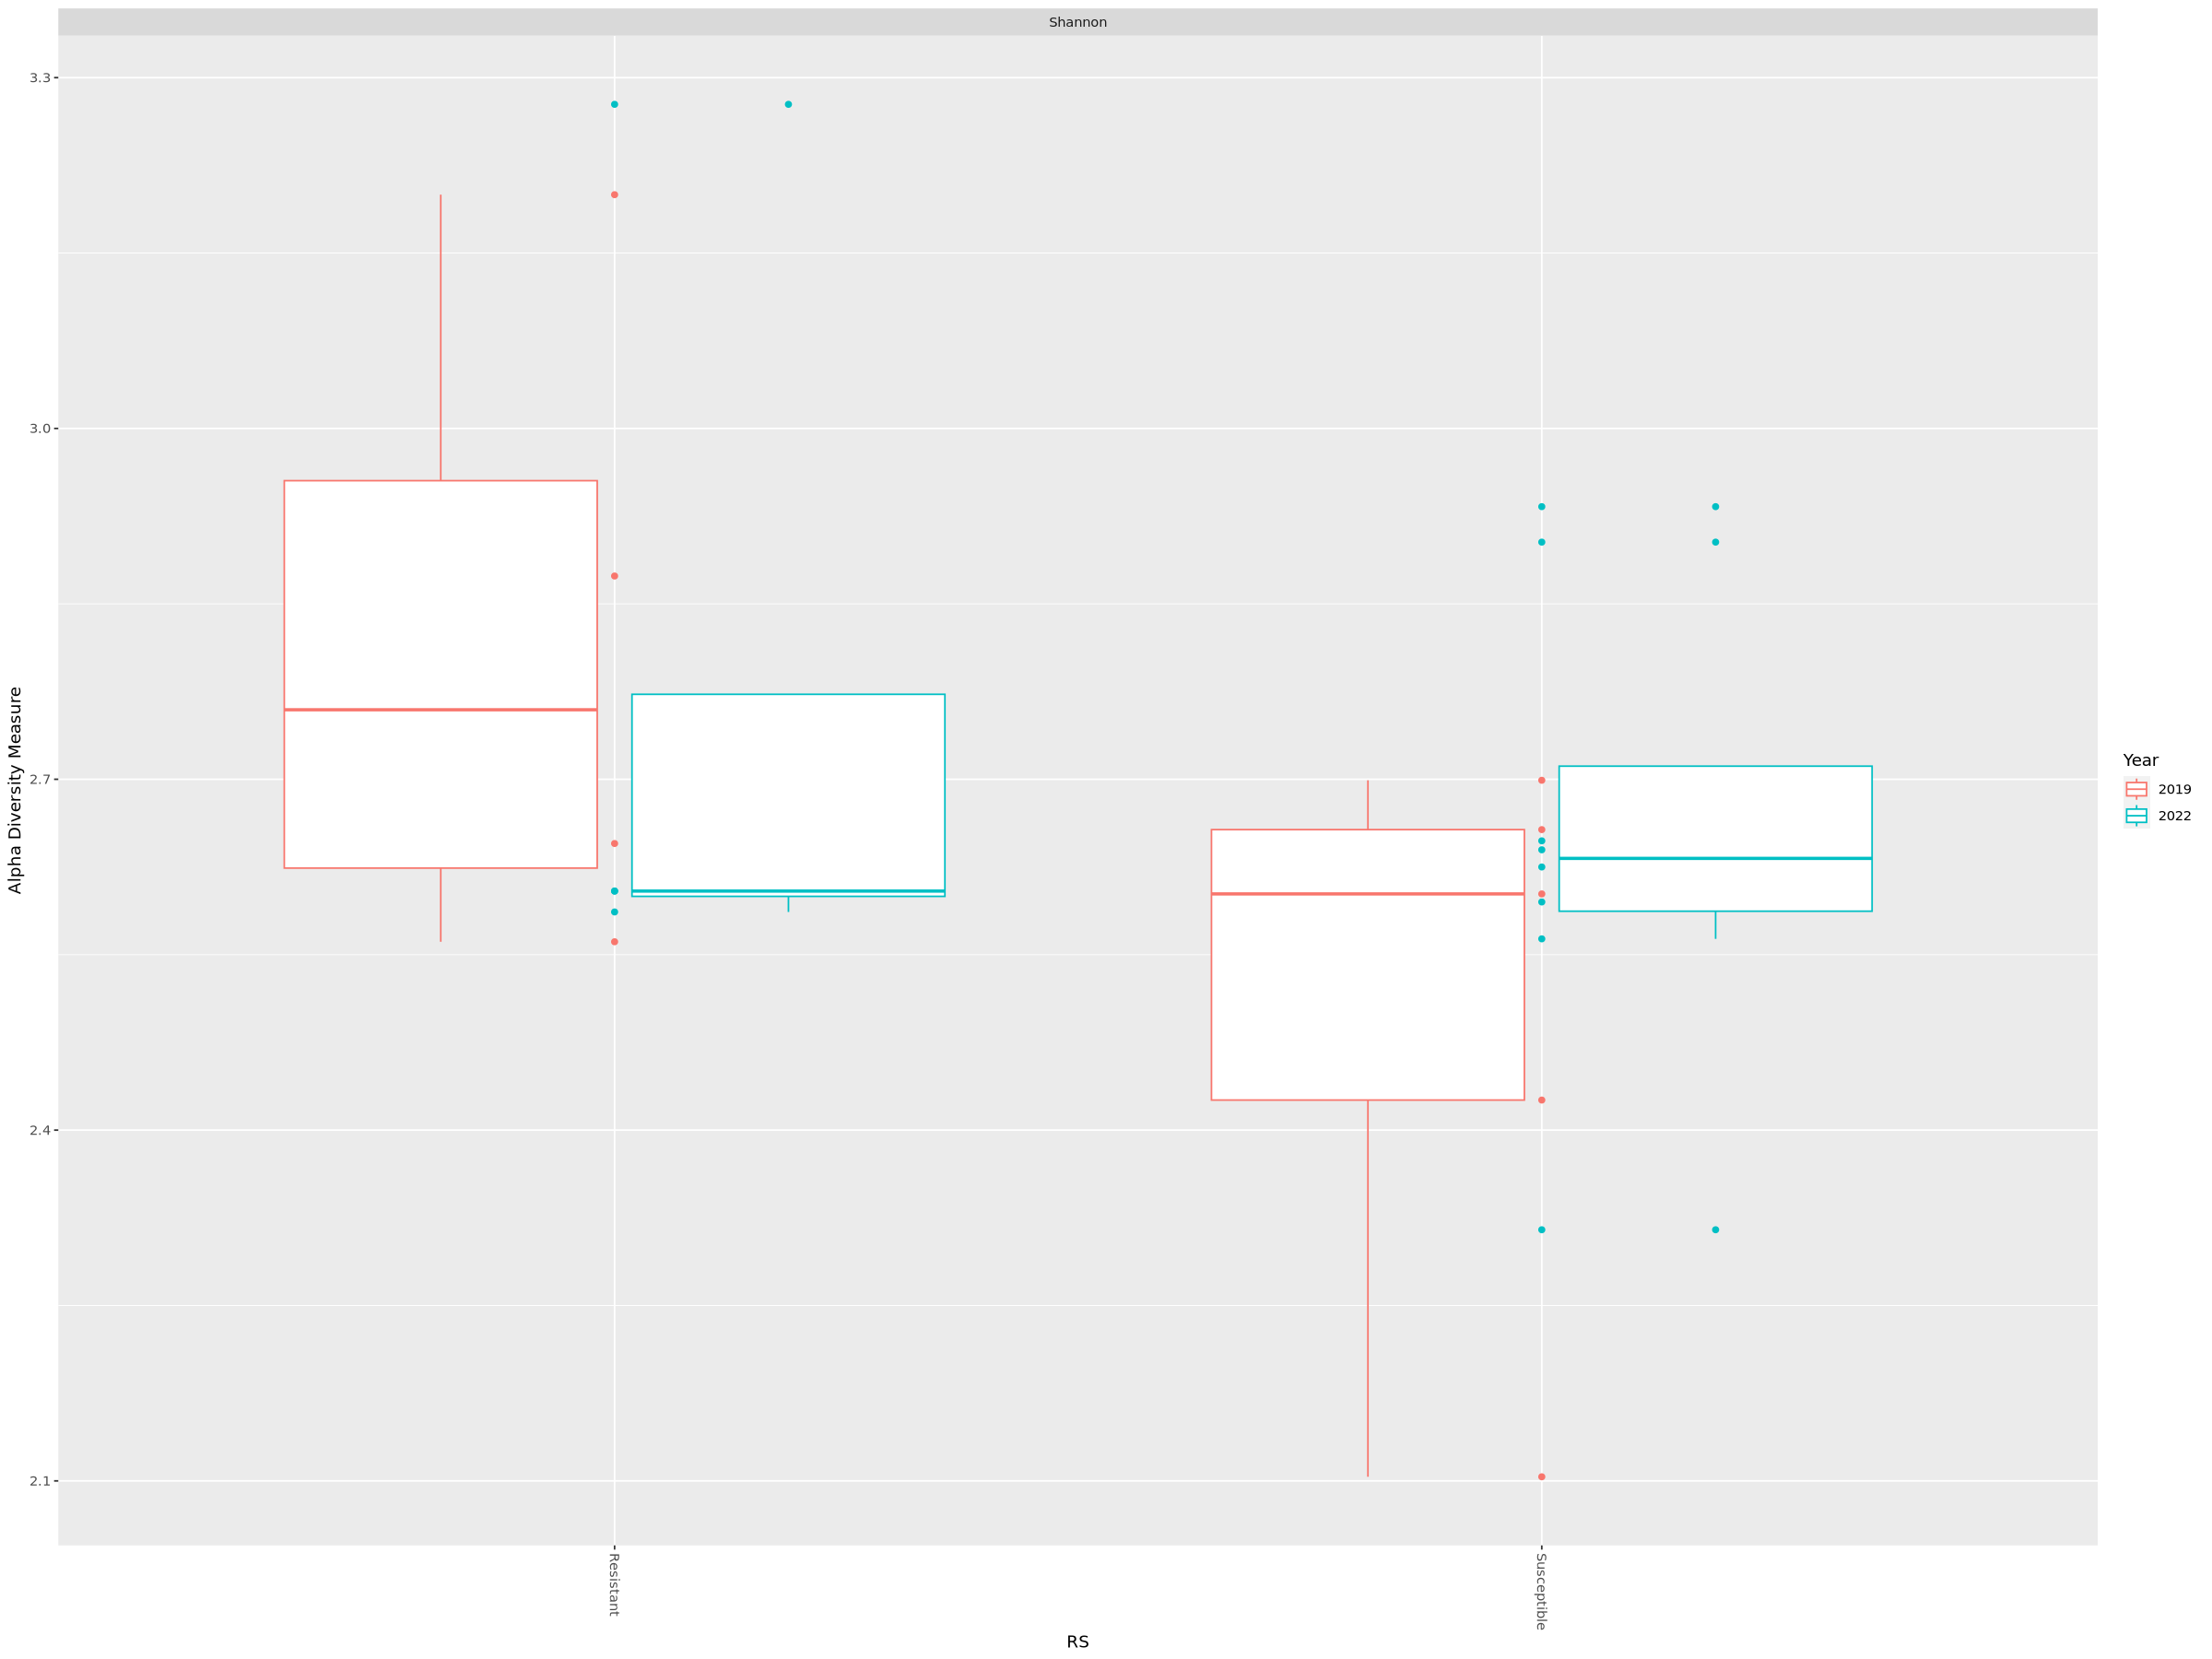

In [138]:

plot_richness(Corals, x="RS", color="Year", measures=c("Shannon")) + geom_boxplot()

In [147]:
ggsave(file="/project/pi_sarah_gignouxwolfsohn_uml_edu/brooke/mcav/figures/shannon_diversity.pdf", width = 15, height=10)

In [139]:
# significance in shannon diversity between R v S
pairwise.wilcox.test(rich$Shannon, sample_data(Corals)$RS)

ERROR: Error in eval(expr, envir, enclos): object 'rich' not found


In [ ]:
# DESEQ
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("DESeq2")


In [ ]:
library("DESeq2")

In [ ]:
sample_data(Corals)$RS <- as.factor(sample_data(Corals)$RS)

In [ ]:
# convert phyloseq to deseq obj 
ds = phyloseq_to_deseq2(Corals, ~ RS)
ds = DESeq(ds)

In [ ]:
# filter otus with a false discovery rate cutoff of 0.01
# return significantly differentially abundant otu b/w R v S
alpha = 0.01
res = results(ds, contrast=c("RS", "Resistant", "Susceptible"), alpha=alpha)
res = res[order(res$padj, na.last=NA), ]
res_sig = res[(res$padj < alpha), ]
res_sig

In [ ]:
# plot significantly different OTUs
res_sig = cbind(as(res_sig, "data.frame"), as(tax_table(Corals)[rownames(res_sig), ], "matrix"))
ggplot(res_sig, aes(x=Genus, y=log2FoldChange, color=Genus)) +
    #geom_jitter(size=3, width = 0.2) +
    theme(axis.text.x = element_text(angle = -90, hjust = 0, vjust=0.5))

In [ ]:
plot_bar(Corals)+
facet_grid(.~RS, scales="free_x", space="free")+
geom_bar(aes(color="Genus", fill="Genus"), stat="identity", position="stack")+
theme_bw()+
theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(angle=90),
          text = element_text(size=20))

In [ ]:
# run plotbar on phyloseq obj

In [ ]:
plot_bar(Corals, fill= "Genus")

In [ ]:
data("GlobalPatterns")
gp.ch = subset_taxa(GlobalPatterns, Phylum == "Chlamydiae")


In [ ]:
plot_bar(Corals)+
facet_grid(.~RS, scales="free_x", space="free")+
geom_bar(aes(color=ta1, fill=ta1), stat="identity", position="stack")+
theme_bw()+
theme(legend.position="right", panel.border = element_blank(), 
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          axis.ticks.x=element_blank(), axis.line=element_line(color="black"), axis.text=element_text(angle=90),
          text = element_text(size=20))

In [ ]:
#Example: 
DE17_100 = prune_taxa(names(sort(taxa_sums(DE17),TRUE)[1:100]), DE17)
plot_bar(DE17_100, fill="Family")+
theme_bw()+
scale_fill_manual(values=mycolors)+
theme(legend.position = "right", text = element_text(size=18), axis.text.x = element_blank())+
facet_grid(.~Site, scales="free_x")

In [ ]:
plot_bar(Corals,  fill="ta1") +
geom_bar(aes(color="ta1", fill="ta1"), stat="identity", position="stack")+
theme_bw()+
theme(axis.text.x = element_text(angle = 90))

In [ ]:
plot_bar(Corals, fill=OTU)+
theme_bw()+
theme(legend.position = "right", text = element_text(size=18), axis.text.x = element_blank())+
facet_grid(.~RS, scales="free_x")

#### Trying something other than phyloseq

In [ ]:
#install.packages("reshape2")
library(ggplot2)
library(reshape2)

In [ ]:
# keep top 100 otus
otus_sorted <- otu_table[1:100, ]
dim(otus_sorted)

In [ ]:
otu_t <- t(otus_sorted)
head(otu_t)

In [ ]:
rownames=rownames(otu_t)
rownames

In [ ]:

pcm = melt(otus_sorted, id=rownames)
pcm

In [ ]:
colnames(pcm)=c("otu","sample","count")

In [ ]:
#make the plot!
mx = ggplot(pcm, aes(x = sample, fill = otu, y = count)) + 
    geom_bar(stat = "identity", colour = "black") + 
    theme(axis.text.x = element_text(angle = 90, size = 14, colour = "black", vjust = 0.5, hjust = 1, face= "bold"), 
    axis.title.y = element_text(size = 16, face = "bold"), legend.title = element_text(size = 16, face = "bold"), 
    legend.text = element_text(size = 12, face = "bold", colour = "black"), 
    axis.text.y = element_text(colour = "black", size = 12, face = "bold")) + 
    scale_y_continuous(expand = c(0,0)) + 
    labs(x = "", y = "Relative Abundance (%)", fill = "OTU") + 
    scale_fill_manual(values = colours)
    
mx

In [ ]:
ggplot(pcm, aes(x = sample, fill = otu, y = count))+ 
    geom_bar(stat = "identity", colour = "black") 